# 스크레이핑, 크롤링
- Scraping: 웹 사이트의 특정 정보를 추출하는 것. 웹 데이터의 구조 분석이 필요
- 로그인이 필요한 경우가 많다
- Crawling: 프로그램이 웹사이트를 정기적으로 돌며 정보를 추출하는 것 (이러한 프로그램을 크롤러, 스파이더라고 한다)

#### 웹에서 파일 다운로드하기

In [4]:
''' request: the de facto standard for making HTTP requests in Python
>>> requests.get
>>> requests.post('https://httpbin.org/post', data={'key':'value'})
>>> requests.put('https://httpbin.org/put', data={'key':'value'})
>>> requests.delete('https://httpbin.org/delete')
>>> requests.head('https://httpbin.org/get')
>>> requests.patch('https://httpbin.org/patch', data={'key':'value'})
>>> requests.options('https://httpbin.org/get')
'''

" request: the de facto standard for making HTTP requests in Python\nrequests.get\nrequests.post('https://httpbin.org/post', data={'key':'value'})\nrequests.put('https://httpbin.org/put', data={'key':'value'})\nrequests.delete('https://httpbin.org/delete')\nrequests.head('https://httpbin.org/get')\nrequests.patch('https://httpbin.org/patch', data={'key':'value'})\nrequests.options('https://httpbin.org/get')\n"

In [12]:
import re
import requests           # the de facto standard for making HTTP requests in Python
                          # request - get, post
# 참고사이트: https://realpython.com/python-requests/

In [20]:
# 아래와 같이 파일로 저장하여 읽어도 됨.
!curl https://www.daum.net -o ttt
# !type ttt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  100k    0  100k    0     0   100k      0 --:--:-- --:--:-- --:--:--  584k
100  212k    0  212k    0     0   212k      0 --:--:-- --:--:-- --:--:-- 1137k


# 다음 실시간 검색 
- Requets 모듈 이용 (표준 라이브러리) : to get Web text file (html)
- using html parser (BeautifulSoup)

In [17]:
html = requests.get("https://daum.com")

'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메인에서 다양한 
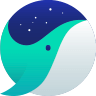
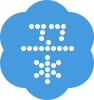

In [18]:
html.text

In [9]:
title_list = soup.select('.hotissue_mini a[class*=link_issue]')
# title_list = soup.select('a[class*=link_issue]')
ranking = soup.select('.list_mini span[class*=ir_wa]')

In [ ]:
import requests
from bs4 import BeautifulSoup
html = requests.get('http://www.daum.net')
# html.encoding = 'utf-8'
soup = BeautifulSoup(html.text, "lxml")

In [10]:
title_list

[]

In [21]:
ranking

[<span class="ir_wa">1위</span>,
 <span class="ir_wa">2위</span>,
 <span class="ir_wa">3위</span>,
 <span class="ir_wa">4위</span>,
 <span class="ir_wa">5위</span>,
 <span class="ir_wa">6위</span>,
 <span class="ir_wa">7위</span>,
 <span class="ir_wa">8위</span>,
 <span class="ir_wa">9위</span>,
 <span class="ir_wa">10위</span>]

In [426]:
for rank,title in zip(ranking , title_list):
    
    # r = ''.join(rank)
    # t = ''.join(title)
    # print("{}:{}".format(r, t))
    print(rank.string, title.string)

1위 김경란
2위 김우중
3위 이성민
4위 동백꽃 필 무렵
5위 노브레인
6위 변요한
7위 교통상황
8위 우한 폐렴
9위 이성우
10위 이상민


In [427]:
# Remember that a single tag can have multiple values for its “class” attribute. 
# When you search for a tag that matches a certain CSS class, you’re matching against
# any of its CSS classes:

css_soup = BeautifulSoup('<p class="body strikeout"></p>')
css_soup.find_all("p", class_="strikeout")
# [<p class="body strikeout"></p>]

css_soup.find_all("p", class_="body")
# [<p class="body strikeout"></p>]

# If you want to search for tags that match two or more CSS classes, 
# you should use a CSS selector:
css_soup.select("p.strikeout.body")
# [<p class="body strikeout"></p>]

[<p class="body strikeout"></p>]

### url 관련 데이터 처리 - http 또는 ftp 사용해 데이터 다운로드 하는데 사용, 3가지 요소는
- web protocol (http)
- server domain name or IP address (www.britannica.co.kr)
- path and file name (world)
- (ex) URL http://www.britannica.co.kr/world

In [19]:
# !mkdir data

In [20]:
# !dir

In [61]:
### http 또는 url 을 이용해 파일을 다운로드 받는데 사용 ###
import urllib.request

url = "http://uta.pw/shodou/img/28/214.png"  # png file: portable network graphics (인터넷 전송 목적으로)
                                             # 무손실 데이터 압축을 사용하는 비트맵 이미지 파일
savename = "data/test.png"
urllib.request.urlretrieve(url, savename)

('data/test.png', <http.client.HTTPMessage at 0x262c4eebc88>)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
'''
Note that:
Python2: urllib.request.urlopen() returns a http.client.HTTPResponse
Python3: urllib.urlopen(url) returns an instance
Request: request.get(url) returns a requests.models.Response
'''

'\nNote that:\nPython2: urllib.request.urlopen() returns a http.client.HTTPResponse\nPython3: urllib.urlopen(url) returns an instance\nRequest: request.get(url) returns a requests.models.Response\n'

### to use requests.get()

In [ ]:
res = requests.get('http://uta.pw/shodou/img/28/214.png')
# print(res.content)
from PIL import Image
from io import BytesIO

i = Image.open(BytesIO(res.content))
plt.imshow(i)

#### urlopen() 사용법
- 위의 urlretrive()는 데이터를 파일에 바로 저장하였다.
- urlopen()을 사용하면 데이터를 파이선에서 읽을 수 있다.


- urllib는 URL 작업을 위한 여러 모듈을 모은 패키지입니다.:

  - URL을 열고 읽기 위한 urllib.request
  - urllib.request에 의해 발생하는 예외를 포함하는 urllib.error
  - URL 구문 분석을 위한 urllib.parse
  - robots.txt 파일을 구문 분석하기 위한 urllib.robotparser

### to use url.request

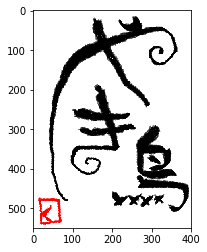

In [65]:
mem = urllib.request.urlopen(url).read()
# type(mem)   # bytes

with open(savename, "wb") as f:           # t: text, b: binary
    f.write(mem)

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread(savename))

#### 웹 API 이용하기
- 클라이언트정보를 보여주는 샘플 api 사이트 접속

In [66]:
# just for reference (string and bytes are different !)
# Bytes literals are always prefixed with 'b' or 'B'; they produce an instance of the bytes type 
# instead of the str type. They may only contain ASCII characters; bytes with a numeric value of 
# 128 or greater must be expressed with escapes.
bytes = b'123\n456'
print(bytes)
print(bytes.decode('utf-8'))
print("-------")
str = """123
456"""
print(str)
print(str.encode('utf-8'))

b'123\n456'
123
456
-------
123
456
b'123\n456'


In [67]:
url = "http://api.aoikujira.com/ip/ini"
res = urllib.request.urlopen(url)
data = res.read()           # 바이너리 데이터

In [68]:
data

b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=114.205.201.61\nREMOTE_HOST=114.205.201.61\nREMOTE_PORT=50018\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.6\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'

In [69]:
text = data.decode("utf-8")     # 바이너리 데이터를 문자열로 변환
text

'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=114.205.201.61\nREMOTE_HOST=114.205.201.61\nREMOTE_PORT=50018\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.6\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'

In [70]:
print(text), print(data)

[ip]
API_URI=http://api.aoikujira.com/ip/get.php
REMOTE_ADDR=114.205.201.61
REMOTE_HOST=114.205.201.61
REMOTE_PORT=50018
HTTP_HOST=api.aoikujira.com
HTTP_USER_AGENT=Python-urllib/3.6
HTTP_ACCEPT_LANGUAGE=
HTTP_ACCEPT_CHARSET=
SERVER_PORT=80
FORMAT=ini


b'[ip]\nAPI_URI=http://api.aoikujira.com/ip/get.php\nREMOTE_ADDR=114.205.201.61\nREMOTE_HOST=114.205.201.61\nREMOTE_PORT=50018\nHTTP_HOST=api.aoikujira.com\nHTTP_USER_AGENT=Python-urllib/3.6\nHTTP_ACCEPT_LANGUAGE=\nHTTP_ACCEPT_CHARSET=\nSERVER_PORT=80\nFORMAT=ini\n\n'


(None, None)

#### parameter 를 전송해서 데이터를 읽는 방법

In [71]:
# 파라미터를 전송하여 데이터를 읽는 예
import urllib.parse
API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"  # java server pages - 자바 기반의 ServerSide
                                                                 # 스크립트언어 (웹에서 HTML 코드에 넣어 사용)
                                                                 
# 파라미터 코딩, 딕셔너리 사용, 109: 서울 경기지역
values = {
    'stdId': '109'
}

params = urllib.parse.urlencode(values)    # 표준 url 포맷으로
                                           # (Any query string or path parameter placed in the URL must be properly URL encoded.)
values, params

({'stdId': '109'}, 'stdId=109')

In [72]:
url = API + "?" + params
print ("url=", url)

data = urllib.request.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)

url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2019년 08월 19일 (월)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2019년 08월 19일 (월)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201908191800</tm>
		<wf><![CDATA[기압골의 영향으로 22일 전국에, 24일은 남부지방에 비가 오겠습니다. <br />한편, 동풍의 영향으로 25일과 26일은 강원영동에 비가 오겠고, 그 밖의 날은 북태평양고기압의 가장자리에 들어 구름많은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~23℃, 최고기온: 26~31℃)보다 조금 높겠습니다.<br />강수량은 평년(6~17mm)보다 많겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<province>서울ㆍ인천ㆍ경기도</prov

####  GET  요청을 사용하여 파라미터를 보내는 경우
- URL 끝 부분에 ?를 입력하고 key = value 형식으로 매개변수를 추가한다. 여러개의 파라미터를 넣는 경우 &를 사용하여 구분한다
- 한글 등이 파라미터로 사용될 때는 반드시 이러한 코딩을 해주어야 한다

#### 키보드에서 파라미터를 입력받는 방법

In [73]:
import sys
import urllib.parse as parse
import urllib.request as req

# 명령어를 사용하는 경우 사용법 python3 forecast.py 108
# if len(sys.argv) <= 1:
#     print("python3 forecast.py 지역번호")
#     sys.exit()  
# regionNumber = sys.argv[1]

regionNumber = input()

API = "http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp"

values = {
    'stdId': regionNumber
}

params = parse.urlencode(values)
url = API + "?" + params
print ("url=", url)
data = req.urlopen(url).read() # 바이너리 데이터를 문자열로 변환
text = data.decode("utf-8")
print(text)


109
url= http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp?stdId=109
<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2019년 08월 19일 (월)요일 18:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2019년 08월 19일 (월)요일 18:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>201908191800</tm>
		<wf><![CDATA[기압골의 영향으로 22일 전국에, 24일은 남부지방에 비가 오겠습니다. <br />한편, 동풍의 영향으로 25일과 26일은 강원영동에 비가 오겠고, 그 밖의 날은 북태평양고기압의 가장자리에 들어 구름많은 날이 많겠습니다.<br />기온은 평년(최저기온: 18~23℃, 최고기온: 26~31℃)보다 조금 높겠습니다.<br />강수량은 평년(6~17mm)보다 많겠습니다.]]></wf>
	</header>
	<body>
				

		<location wl_ver="3">
				<province>서울ㆍ인천ㆍ경기도</

# Scraping example (Webtoon 읽어 오기)

### 1. 특별 조건

In [53]:
from bs4 import BeautifulSoup
url ='http://comic.naver.com/webtoon/list.nhn?titleId=20853&weekday=fri'
# url = 'https://comic.naver.com/webtoon/weekdayList.nhn?week=fri'
data = requests.get(url).text

In [54]:
print(data)




  







<!DOCTYPE html>
<html lang="ko">
<head>
	
		
		
		
		
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		
	<meta http-equiv="Content-type" content="text/html; charset=UTF-8">
	<title>마음의소리 :: 네이버 만화</title>
	


















    
    
    
        <meta property="og:title" content="마음의소리">
        <meta property="og:image" content="https://shared-comic.pstatic.net/thumb/webtoon/20853/thumbnail/thumbnail_IMAG19_414f9328-9245-472a-bf67-62094b575453.jpg" >
        <meta property="og:description" content="솔직 담백 최강의 개그 만화 &lt;마음의 소리&gt;날 가져요 엉엉">
    
    
    
    
    
    
    
    
    


<meta property="og:url" content="https://comic.naver.com/webtoon/list.nhn?titleId=20853&amp;weekday=fri" >
<meta property="og:type" content="article" >
<meta property="og:article:author" content="네이버 웹툰" >
<meta property="og:article:author:url" content="https://comic.naver.com" >

	<link rel="shortcut icon" href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favico

In [55]:
soup = BeautifulSoup(data, 'lxml')

In [56]:
cartoons = soup.find_all('td', attrs={'class':'title'})
len(cartoons)

10

In [57]:
cartoons[0]

<td class="title">
<a href="/webtoon/detail.nhn?titleId=20853&amp;no=1212&amp;weekday=fri" onclick="nclk_v2(event,'lst.title','20853','1212')">1208. 게</a>
</td>

In [58]:
cartoons[0].find('a').text

'1208. 게'

In [59]:
cartoons[0].find('a').attrs

{'href': '/webtoon/detail.nhn?titleId=20853&no=1212&weekday=fri',
 'onclick': "nclk_v2(event,'lst.title','20853','1212')"}

In [60]:
cartoons[0].find('a')['href']

'/webtoon/detail.nhn?titleId=20853&no=1212&weekday=fri'

In [61]:
cartoons[1].find('a')['href']

'/webtoon/detail.nhn?titleId=20853&no=1211&weekday=fri'

In [62]:
for item in cartoons:
    print(item.find('a').text, item.find('a')['href'])

1208. 게 /webtoon/detail.nhn?titleId=20853&no=1212&weekday=fri
1207. 하프라이프 /webtoon/detail.nhn?titleId=20853&no=1211&weekday=fri
1206. 요즘 사위 /webtoon/detail.nhn?titleId=20853&no=1210&weekday=fri
1205. 담배주세요 /webtoon/detail.nhn?titleId=20853&no=1209&weekday=fri
1204. 나만의 편지함 /webtoon/detail.nhn?titleId=20853&no=1208&weekday=fri
1203. 그 동상 /webtoon/detail.nhn?titleId=20853&no=1207&weekday=fri
1202. 당숙 어르신 /webtoon/detail.nhn?titleId=20853&no=1206&weekday=fri
1201. 겨울 옷차림 /webtoon/detail.nhn?titleId=20853&no=1205&weekday=fri
1200. 양심의소리 /webtoon/detail.nhn?titleId=20853&no=1204&weekday=fri
1199. 백야 /webtoon/detail.nhn?titleId=20853&no=1203&weekday=fri


### 2. 웹 페이지 전체 읽기 

In [63]:
import requests
from bs4 import BeautifulSoup
html = requests.get('http://comic.naver.com/webtoon/weekday.nhn').text
soup = BeautifulSoup(html, "lxml")

In [8]:
print(html)




  







<!DOCTYPE html>
<html lang="ko">
<head>
	
		
		
		
		
		<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		
	<meta http-equiv="Content-type" content="text/html; charset=UTF-8">
	<title>네이버 만화 > 요일별  웹툰 > 전체웹툰</title>
	


















    
    
    
    
    
    
    
    
    
    
    
        <meta property="og:title" content="네이버 웹툰" >
        <meta property="og:image" content="https://ssl.pstatic.net/static/comic/images/og_tag_v2.png" >
        <meta property="og:description" content="매일매일 새로운 재미, 네이버 웹툰.">
    


<meta property="og:url" content="https://comic.naver.com/webtoon/weekday.nhn" >
<meta property="og:type" content="article" >
<meta property="og:article:author" content="네이버 웹툰" >
<meta property="og:article:author:url" content="https://comic.naver.com" >

	<link rel="shortcut icon" href="https://ssl.pstatic.net/static/comic/favicon/webtoon_favicon_32x32.ico" type="image/x-icon">
	
	<script type="text/javascript">
		document.domain = "naver.co

In [64]:
titles = soup.find_all("a", "title")

In [65]:
print(len(titles))
titles[0]

325


<a class="title" href="/webtoon/list.nhn?titleId=183559&amp;weekday=mon" onclick="nclk_v2(event,'thm*m.tit','','1')" title="신의 탑">신의 탑</a>

In [11]:
for i in range(len(titles)):
    print (titles[i].text,'\t\t', titles[i]['href'])

신의 탑 		 /webtoon/list.nhn?titleId=183559&weekday=mon
윈드브레이커 		 /webtoon/list.nhn?titleId=602910&weekday=mon
뷰티풀 군바리 		 /webtoon/list.nhn?titleId=648419&weekday=mon
인생존망 		 /webtoon/list.nhn?titleId=733766&weekday=mon
평범한 8반 		 /webtoon/list.nhn?titleId=597478&weekday=mon
귀전구담 		 /webtoon/list.nhn?titleId=694946&weekday=mon
백수세끼 		 /webtoon/list.nhn?titleId=733074&weekday=mon
용비불패 완전판 		 /webtoon/list.nhn?titleId=723714&weekday=mon
니편내편 		 /webtoon/list.nhn?titleId=702422&weekday=mon
악취 		 /webtoon/list.nhn?titleId=729946&weekday=mon
칼가는 소녀 		 /webtoon/list.nhn?titleId=730174&weekday=mon
장씨세가 호위무사 		 /webtoon/list.nhn?titleId=728750&weekday=mon
아는 여자애 		 /webtoon/list.nhn?titleId=738809&weekday=mon
링크보이 		 /webtoon/list.nhn?titleId=714185&weekday=mon
이것도 친구라고 		 /webtoon/list.nhn?titleId=698888&weekday=mon
히어로메이커 		 /webtoon/list.nhn?titleId=21815&weekday=mon
마왕이 되는 중2야 		 /webtoon/list.nhn?titleId=694807&weekday=mon
교환일기 		 /webtoon/list.nhn?titleId=727826&weekday=mon
신을 죽이는 방법 		 /web

# Daum 실시간 검색 순위

In [27]:
import requests
from bs4 import BeautifulSoup
html = requests.get('http://www.daum.net')
# html.encoding = 'utf-8'
soup = BeautifulSoup(html.text, "lxml")

In [28]:
soup
# titles = soup.find_all("a", class_="link_issue")
# len(titles)

<!DOCTYPE html>
<html class="" lang="ko">
<head>
<meta charset="utf-8"/>
<title>Daum</title>
<meta content="https://www.daum.net/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="Daum" property="og:title"/>
<meta content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001" property="og:image"/>
<meta content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum" property="og:description"/>
<meta content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico" name="msapplication-task"/>
<meta content="name=미디어다음;action-uri=http://media.daum.net/;icon-uri=/media_favicon.ico" name="msapplication-task"/>
<meta content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico" name="msapplication-task"/>
<meta content="origin" name="referrer"/>
<link href="//search.daum.net/OpenSearch.xml" rel="search" title="다음" type="application/opensearchdescription+xml"/>
<style type="text/css">
@charset "utf-8";
body,div,dl,dt,dd,ul,ol,li,h1,h2,h3,h4,h5,h6,pre,c

In [29]:
import re
# div_cont = soup.find_all("div", class_=re.compile("rank_cont"))
div_cont = soup.find_all("div", class_="rank_cont")

In [30]:
div_cont

[<div class="rank_cont">
 <span class="num_pctop rank1"><span class="ir_wa">1위</span></span>
 <span class="txt_issue"><a class="link_issue" href="https://search.daum.net/search?w=tot&amp;q=%EA%B3%A0%EC%88%98%EC%A0%95&amp;DA=ATG&amp;rtmaxcoll=1TH">고수정</a></span>
 </div>, <div aria-hidden="true" class="rank_cont">
 <span class="num_pctop rank1"><span class="ir_wa">1위}</span></span>
 <span class="txt_issue"><a class="link_issue" href="https://search.daum.net/search?w=tot&amp;q=%EA%B3%A0%EC%88%98%EC%A0%95&amp;DA=ATG&amp;rtmaxcoll=1TH" tabindex="-1">고수정</a></span>
 </div>, <div class="rank_cont">
 <span class="num_pctop rank2"><span class="ir_wa">2위</span></span>
 <span class="txt_issue"><a class="link_issue" href="https://search.daum.net/search?w=tot&amp;q=%EC%9E%A5%EB%AC%B8%EB%B3%B5&amp;DA=ATG&amp;rtmaxcoll=1TH">장문복</a></span>
 </div>, <div aria-hidden="true" class="rank_cont">
 <span class="num_pctop rank2"><span class="ir_wa">2위}</span></span>
 <span class="txt_issue"><a class="link_iss

In [31]:
len(div_cont)

50

In [32]:
div_cont[0]

<div class="rank_cont">
<span class="num_pctop rank1"><span class="ir_wa">1위</span></span>
<span class="txt_issue"><a class="link_issue" href="https://search.daum.net/search?w=tot&amp;q=%EA%B3%A0%EC%88%98%EC%A0%95&amp;DA=ATG&amp;rtmaxcoll=1TH">고수정</a></span>
</div>

In [33]:
# dir(div_cont[0])

In [34]:
div_cont[1].attrs

{'class': ['rank_cont'], 'aria-hidden': 'true'}

In [36]:
div_cont[0].attrs, div_cont[1].attrs, div_cont[20].attrs, \
div_cont[30].attrs,div_cont[31].attrs

({'class': ['rank_cont']},
 {'class': ['rank_cont'], 'aria-hidden': 'true'},
 {'class': ['rank_cont', '@1']},
 {'class': ['rank_cont', '@1']},
 {'class': ['rank_cont', '@1'], 'aria-hidden': 'true'})

In [37]:
type(div_cont[0].attrs['class'])

list

In [38]:
len(div_cont[0].attrs), len(div_cont[1].attrs)

(1, 2)

In [39]:
len(div_cont[0].attrs['class']), len(div_cont[20].attrs['class'])

(1, 2)

In [40]:
# div="rank_cont" 인 것이 5 개씩 있다. 따라서 그 중 하나만을 선택하도록 해야 함.
# div_cont[0:2], div_cont[20:22], div_cont[30]

In [41]:
rank = div_cont[0].find("span", class_="ir_wa").text
title = div_cont[0].find("a", class_="link_issue").text
print (rank,":", title)

1위 : 고수정


In [42]:
### 최종 Solution ###
for i in range(len(div_cont)):
    if len(div_cont[i].attrs) == 1 and len(div_cont[i].attrs['class']) == 1:
        rank = div_cont[i].find("span", class_="ir_wa").text
        title = div_cont[i].find("a", class_="link_issue").text
        print (rank, ":", title)

1위 : 고수정
2위 : 장문복
3위 : 방법
4위 : 도깨비
5위 : 작은 아씨들
6위 : 이재정
7위 : 백기완
8위 : 최영미
9위 : 김성재
10위 : 신진서


# JSON 파일
- JSON (JavaScript Object Notation) 은 XML, YAML 과 함께 효율적으로 데이터를 저장하고 교환(exchange data)하는데 사용하는 텍스트 데이터 포맷 중의 하나
- JSON은 사람이 읽고 쓰기에 쉬우며, 또한 기계가 파싱하고 생성하기도에 쉬움.
- JSON은 그 이름에서 유추할 수 있듯이 JavaScript의 프로그래밍 언어의 부분에 기반하고 있으며, C-family 프로그램밍 언어 (C, C++, C#, Java, JavaScript, Perl, Python 등)의 규약을 따르고 있어서 C-family 프로그래밍 언어 간 데이터를 교환하는데 적합.

#### JSON은 아래의 두개의 구조로 이루어져 있습니다.
- (1) 이름/값 쌍의 집합 (A collection of name/value pairs): object, record, struct, dictionary, hash table, keyed list, associative array
- (2) 정렬된 값의 리스트 (An ordered list of values): array, vector, list, sequence

In [7]:
import json
x = {"value1": 23, "value2": 45}
filename = "test.json"
with open(filename, "w") as f:
    json.dump(x, f)
with open(filename, "r") as f:
    result = json.load(f)
    print (result)

{'value1': 23, 'value2': 45}


In [6]:
!type test.json

{"value1": 23, "value2": 45}


In [388]:
# JSON exercise1
from pandas.io.json import json_normalize
data = [{'id': 1, 'name': {'first': '길동', 'last': '홍'}},
        {'name': {'given': '꺽정', 'family': '임'}},
        {'id': 2, 'name': '나대리'}]
print(data)             # list of dicts
json_normalize(data)    # Normalize semi-structured JSON data (unserialized Json object)
                        # into a flat table.

[{'id': 1, 'name': {'first': '길동', 'last': '홍'}}, {'name': {'given': '꺽정', 'family': '임'}}, {'id': 2, 'name': '나대리'}]


id name.first name.last name.given name.family name
0  1.0         길동         홍        NaN         NaN  NaN
1  NaN        NaN       NaN         꺽정           임  NaN
2  2.0        NaN       NaN        NaN         NaN  나대리

In [398]:
# Exercise 2 (from https://rfriend.tistory.com/474)
py_data = {

    "1.FirstName": "Gildong",
    "2.LastName": "Hong",
    "3.Age": 20,
    "4.University": "Ajou University",
    "5.Courses": [
        {
            "Classes": [
                "Probability",
                "Generalized Linear Model",
                "Categorical Data Analysis"
            ],
            "Major": "Statistics"
        },
        {
            "Classes": [
                "Data Structure",
                "Programming",
                "Algorithms"
            ],
            "Minor": "ComputerScience"
        }
    ]
}

In [399]:
type(data)

dict

In [401]:
import json
json_str = json.dumps(py_data)
print(type(json_str))
json_str

<class 'str'>


'{"1.FirstName": "Gildong", "2.LastName": "Hong", "3.Age": 20, "4.University": "Ajou University", "5.Courses": [{"Classes": ["Probability", "Generalized Linear Model", "Categorical Data Analysis"], "Major": "Statistics"}, {"Classes": ["Data Structure", "Programming", "Algorithms"], "Minor": "ComputerScience"}]}'

In [405]:
json_normalize(py_data)

1.FirstName 2.LastName  3.Age     4.University  \
0     Gildong       Hong     20  Ajou University   

                                           5.Courses  
0  [{'Classes': ['Probability', 'Generalized Line...

In [407]:
json_normalize(py_data,"5.Courses")

Classes       Major  \
0  [Probability, Generalized Linear Model, Catego...  Statistics   
1          [Data Structure, Programming, Algorithms]         NaN   

             Minor  
0              NaN  
1  ComputerScience

In [414]:
# JSON exercise3
# from https://pandas.pydata.org/pandas-docs/stable/reference/api/\
#              pandas.io.json.json_normalize.html
data = [{'state': 'Florida', 
         'shortname': 'FL', 
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [415]:
from pandas.io.json import json_normalize
# result3 = json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])
# result2 = json_normalize(data, 'counties', ['state', 'shortname'])
# result1 = json_normalize(data)

json_normalize(data)  # “Normalize” semi-structured JSON data into a flat table (dataframe 형태로)

state shortname                                           counties  \
0  Florida        FL  [{'name': 'Dade', 'population': 12345}, {'name...   
1     Ohio        OH  [{'name': 'Summit', 'population': 1234}, {'nam...   

  info.governor  
0    Rick Scott  
1   John Kasich

In [416]:
json_normalize(data,['counties'])

name  population
0        Dade       12345
1     Broward       40000
2  Palm Beach       60000
3      Summit        1234
4    Cuyahoga        1337

In [417]:
json_normalize(data,'counties')

name  population
0        Dade       12345
1     Broward       40000
2  Palm Beach       60000
3      Summit        1234
4    Cuyahoga        1337

In [418]:
json_normalize(data,'counties','state')

name  population    state
0        Dade       12345  Florida
1     Broward       40000  Florida
2  Palm Beach       60000  Florida
3      Summit        1234     Ohio
4    Cuyahoga        1337     Ohio

In [419]:
json_normalize(data, 'counties', ['state', 'shortname'])

name  population    state shortname
0        Dade       12345  Florida        FL
1     Broward       40000  Florida        FL
2  Palm Beach       60000  Florida        FL
3      Summit        1234     Ohio        OH
4    Cuyahoga        1337     Ohio        OH

In [420]:
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

name  population    state shortname info.governor
0        Dade       12345  Florida        FL    Rick Scott
1     Broward       40000  Florida        FL    Rick Scott
2  Palm Beach       60000  Florida        FL    Rick Scott
3      Summit        1234     Ohio        OH   John Kasich
4    Cuyahoga        1337     Ohio        OH   John Kasich

# JSON으로 보기 -네이버 실시간 검색 순위

In [44]:
import json, requests
from pandas.io.json import json_normalize

r = requests.get('http://rank.search.naver.com/rank.js')   # http 파일 엑세스 - text
print(r.text)                 # cont-F 로 'data' search 가능

{"ts":"2020-02-12T15:30:00+0900","st":"2020-02-12T15:30:00+0900","et":"2020-02-12T15:30:00+0900","data":[{"category":"general","data":[{"rank":1,"keyword":"고수정","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":2,"keyword":"고수정 도깨비","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":3,"keyword":"장문복","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":4,"keyword":"고수정 지병","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":5,"keyword":"기묘한 가족","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":6,"keyword":"도깨비","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":7,"keyword":"장문복 전여친","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":8,"keyword":"배우 고수정","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},{"rank":9,"keyword":"코로나19","change":"+","score":0,"tvalue":0,"cvalue":0,"ratio":".","delta":0},

In [45]:
json_normalize(json.loads(r.text))

ts                        st  \
0  2020-02-12T15:30:00+0900  2020-02-12T15:30:00+0900   

                         et                                               data  
0  2020-02-12T15:30:00+0900  [{'category': 'general', 'data': [{'rank': 1, ...

In [46]:
json_normalize(json.loads(r.text),'data')

category                                               data
0  general  [{'rank': 1, 'keyword': '고수정', 'change': '+', ...

In [47]:
jj =json_normalize(json.loads(r.text), record_path=['data', 'data']); jj

rank            keyword change  score  tvalue  cvalue ratio  delta
0      1                고수정      +      0       0       0     .      0
1      2            고수정 도깨비      +      0       0       0     .      0
2      3                장문복      +      0       0       0     .      0
3      4             고수정 지병      +      0       0       0     .      0
4      5             기묘한 가족      +      0       0       0     .      0
5      6                도깨비      +      0       0       0     .      0
6      7            장문복 전여친      +      0       0       0     .      0
7      8             배우 고수정      +      0       0       0     .      0
8      9              코로나19      +      0       0       0     .      0
9     10            여의도 칼부림      +      0       0       0     .      0
10    11            장문복 사생활      +      0       0       0     .      0
11    12                 방법      +      0       0       0     .      0
12    13  내가 사랑했던 모든 남자들에게2      +      0       0       0     .      0
13    14               지소미아      +      0       0       0     .      0
14    15                리벤져      +      0       0       0     .      0
15    16                 씨젠      +      0       0       0     .      0
16    17                여의도      +      0       0       0     .      0
17    18            다시 만난 너      +      0       0       0     .      0
18    19                조민수      +      0       0       0     .      0
19    20            이재영 서진용      +      0       0       0     .      0

In [48]:
jj.keyword

0                   고수정
1               고수정 도깨비
2                   장문복
3                고수정 지병
4                기묘한 가족
5                   도깨비
6               장문복 전여친
7                배우 고수정
8                 코로나19
9               여의도 칼부림
10              장문복 사생활
11                   방법
12    내가 사랑했던 모든 남자들에게2
13                 지소미아
14                  리벤져
15                   씨젠
16                  여의도
17              다시 만난 너
18                  조민수
19              이재영 서진용
Name: keyword, dtype: object

In [49]:
jj.rank

<bound method NDFrame.rank of     rank            keyword change  score  tvalue  cvalue ratio  delta
0      1                고수정      +      0       0       0     .      0
1      2            고수정 도깨비      +      0       0       0     .      0
2      3                장문복      +      0       0       0     .      0
3      4             고수정 지병      +      0       0       0     .      0
4      5             기묘한 가족      +      0       0       0     .      0
5      6                도깨비      +      0       0       0     .      0
6      7            장문복 전여친      +      0       0       0     .      0
7      8             배우 고수정      +      0       0       0     .      0
8      9              코로나19      +      0       0       0     .      0
9     10            여의도 칼부림      +      0       0       0     .      0
10    11            장문복 사생활      +      0       0       0     .      0
11    12                 방법      +      0       0       0     .      0
12    13  내가 사랑했던 모든 남자들에게2      +      0      

In [3]:
for i in range(len(jj)):
    rank = (jj.iloc[i])['rank']    # 'rank' 가 python keyword 라는 것 명심
    title = jj.iloc[i].keyword
    print(rank, " : " , title)

NameError: name 'jj' is not defined